In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.stats import sigma_clip
# IMPORTING La Cosmic
import sys
import os
sys.path.insert(0, os.path.abspath('/data_pde01/work/ayumi/pymodule')) #自分のディレクトリにpip install したため
import astroscrappy as LAC

#time 
import time
#from convenience_functions import show_image, display_cosmic_rays


plt.rcParams["figure.facecolor"] = "white"
%matplotlib inline

# import matplotlib.pyplot as plt
# import scipy.interpolate as interp

# from collections import defaultdict
# import csv
# import glob, os
# import requests
# import json
# import heapq
# import math
# from astropy.coordinates import SkyCoord
# import seaborn as sns


In [2]:
path_data = '/data_pde01/work/ayumi/mywork/data/'
path_output = '/data_pde01/work/ayumi/mywork/python/s23b064/output/'
path_fits = path_output+'fits/'
path_figure = path_output+'figure/png/'
log = pd.read_csv("/data_pde01/work/ayumi/mywork/python/s23b064/logsheet.csv",header=4)
log

,Unnamed: 0,Unnamed: 1,Chip 2,Unnamed: 3,Unnamed: 4,NEXPOS,NDR,Airmass,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1.0,18:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Set up start
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,18:22,MCSA00294593,Dome flat (J2231),NaN,3.0,NaN,NaN,OC_ZJ,NaN,zJ500,AT-J2231,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,to 606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,18:29,294607,Dome flat (J2306),NaN,3.0,NaN,NaN,OC_ZJ,NaN,zJ500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Object_ID

objectname = ['J2231','J2306','J2349','J0238','J0100']
stdname = ['HIP115518','HIP17623']
frametype = ['DOMEFLAT','STANDARD','OBJECT']


# 使えないfitsを抽出
## 23:16 294837-..4868 for STD acquisition
## 4:55 295035-..054 for STD acquisition

list_id1 = []
for i in np.arange(294837,294869):
    list_id1.append('MCSA00'+str(i))
    
list_id2 = []
for i in np.arange(295035,295054):
    list_id2.append('MCSA00'+str(i))
    

file = pd.read_csv("/data_pde01/work/ayumi/mywork/python/s23b064/FILE_SUMMARY.csv")
criteria1 = (file.EXPTIME==2)|(file.EXPTIME==3)|(file.EXPTIME==180)
file = file[~file['FRAMEID'].isin(list_id1)]
file = file[~file['FRAMEID'].isin(list_id2)]
file.reset_index(inplace=True)
print(len(file))
file

447


,index,Unnamed: 0,FRAMEID,DATE_OBS,OBJECT,OBS_MODE,DATA_TYP,EXPTIME,DET_ID,SLIT,FILTER_1,FILTER_2,FILTER_3,SEEING,TELESCOP,INSTRUME,AIRMASS,AIRMSTR,AIRMEND,MJD,MJD_STR,MJD_END,UT,UT_STR,UT_END,K_DITCNT
0,0,0,MCSA00294589,2023-08-28,PRECHECK,IMAG,TEST,5.0,1,,Ks,CSLM,HOLE,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.174860,60184.174822,60184.174897,04:11:47.912,04:11:44.674,04:11:51.149,0
1,1,1,MCSA00294590,2023-08-28,PRECHECK,IMAG,TEST,5.0,2,,Ks,CSLM,HOLE,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.174860,60184.174822,60184.174897,04:11:47.912,04:11:44.674,04:11:51.149,0
2,2,2,MCSA00294591,2023-08-28,TEST,SPEC_MOS,TEST,3.0,1,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.181284,60184.181257,60184.181309,04:21:02.919,04:21:00.681,04:21:05.156,0
3,3,3,MCSA00294592,2023-08-28,TEST,SPEC_MOS,TEST,3.0,2,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.181295,60184.181269,60184.181321,04:21:03.919,04:21:01.681,04:21:06.156,0
4,4,4,MCSA00294593,2023-08-28,DOMEFLAT_J2231,SPEC_MOS,DOMEFLAT,3.0,1,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.182025,60184.181998,60184.182050,04:22:06.919,04:22:04.681,04:22:09.156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,491,491,MCSA00295098,2023-08-28,DARK,IMAG,DARK,3.0,2,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654275,60184.654249,60184.654301,15:42:09.392,15:42:07.154,15:42:11.629,0
443,492,492,MCSA00295099,2023-08-28,DARK,IMAG,DARK,3.0,1,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654414,60184.654388,60184.654440,15:42:21.392,15:42:19.154,15:42:23.629,0
444,493,493,MCSA00295100,2023-08-28,DARK,IMAG,DARK,3.0,2,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654414,60184.654388,60184.654440,15:42:21.392,15:42:19.154,15:42:23.629,0
445,494,494,MCSA00295101,2023-08-28,DARK,IMAG,DARK,3.0,1,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654565,60184.654538,60184.654590,15:42:34.392,15:42:32.154,15:42:36.629,0


In [4]:
#Object_ID

objectname = ['J2231','J2306','J2349','J0238','J0100']
stdname = ['HIP115518','HIP17623']
frametype = ['DOMEFLAT','STANDARD','OBJECT']


# 使えないfitsを抽出
## 23:16 294837-..4868 for STD acquisition
## 4:55 295035-..054 for STD acquisition

list_id1 = []
for i in np.arange(294837,294869):
    list_id1.append('MCSA00'+str(i))
    
list_id2 = []
for i in np.arange(295035,295054):
    list_id2.append('MCSA00'+str(i))
    

file = pd.read_csv("/data_pde01/work/ayumi/mywork/python/s23b064/FILE_SUMMARY.csv")
criteria1 = (file.EXPTIME==2)|(file.EXPTIME==3)|(file.EXPTIME==180)
file = file[~file['FRAMEID'].isin(list_id1)]
file = file[~file['FRAMEID'].isin(list_id2)]
file.reset_index(inplace=True)
print(len(file))
file

447


,index,Unnamed: 0,FRAMEID,DATE_OBS,OBJECT,OBS_MODE,DATA_TYP,EXPTIME,DET_ID,SLIT,FILTER_1,FILTER_2,FILTER_3,SEEING,TELESCOP,INSTRUME,AIRMASS,AIRMSTR,AIRMEND,MJD,MJD_STR,MJD_END,UT,UT_STR,UT_END,K_DITCNT
0,0,0,MCSA00294589,2023-08-28,PRECHECK,IMAG,TEST,5.0,1,,Ks,CSLM,HOLE,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.174860,60184.174822,60184.174897,04:11:47.912,04:11:44.674,04:11:51.149,0
1,1,1,MCSA00294590,2023-08-28,PRECHECK,IMAG,TEST,5.0,2,,Ks,CSLM,HOLE,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.174860,60184.174822,60184.174897,04:11:47.912,04:11:44.674,04:11:51.149,0
2,2,2,MCSA00294591,2023-08-28,TEST,SPEC_MOS,TEST,3.0,1,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.181284,60184.181257,60184.181309,04:21:02.919,04:21:00.681,04:21:05.156,0
3,3,3,MCSA00294592,2023-08-28,TEST,SPEC_MOS,TEST,3.0,2,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.181295,60184.181269,60184.181321,04:21:03.919,04:21:01.681,04:21:06.156,0
4,4,4,MCSA00294593,2023-08-28,DOMEFLAT_J2231,SPEC_MOS,DOMEFLAT,3.0,1,AT_J2231,HOLE,OC_ZJ,ZJ500,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.182025,60184.181998,60184.182050,04:22:06.919,04:22:04.681,04:22:09.156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,491,491,MCSA00295098,2023-08-28,DARK,IMAG,DARK,3.0,2,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654275,60184.654249,60184.654301,15:42:09.392,15:42:07.154,15:42:11.629,0
443,492,492,MCSA00295099,2023-08-28,DARK,IMAG,DARK,3.0,1,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654414,60184.654388,60184.654440,15:42:21.392,15:42:19.154,15:42:23.629,0
444,493,493,MCSA00295100,2023-08-28,DARK,IMAG,DARK,3.0,2,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654414,60184.654388,60184.654440,15:42:21.392,15:42:19.154,15:42:23.629,0
445,494,494,MCSA00295101,2023-08-28,DARK,IMAG,DARK,3.0,1,,HOLE,OC_ZJ,BP,0.0,Subaru,MOIRCS,1.0,1.0,1.0,60184.654565,60184.654538,60184.654590,15:42:34.392,15:42:32.154,15:42:36.629,0


In [5]:
#Removes cosmic rays

criteria1 = (file.EXPTIME==2)|(file.EXPTIME==3)|(file.EXPTIME==180)
file = file[~file['FRAMEID'].isin(list_id1)]
file = file[~file['FRAMEID'].isin(list_id2)]
file.reset_index(inplace=True)
print('Total(for science):'+str(len(file)))

# J2306 is the brightest target, thus I will complete reduction for this target first.
o = 1
print(objectname[o])

Total(for science):447
J2306


In [ ]:
load_fits = fits.open(path_data+str(frame['FRAMEID'][i])+'.fits')
img = load_fits[0].data
load_fits.info()
load_fits[2].header

DOMEFLAT
14
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294607_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294608_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294609_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294610_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294611_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294612_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294613_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294614_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294615_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294616_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294617_clip.fits
/data_pde01/work/ayumi/mywork/python/s23b064/output/fits/MCSA00294618_clip.fits
/data_pde01/work/ayumi/mywor

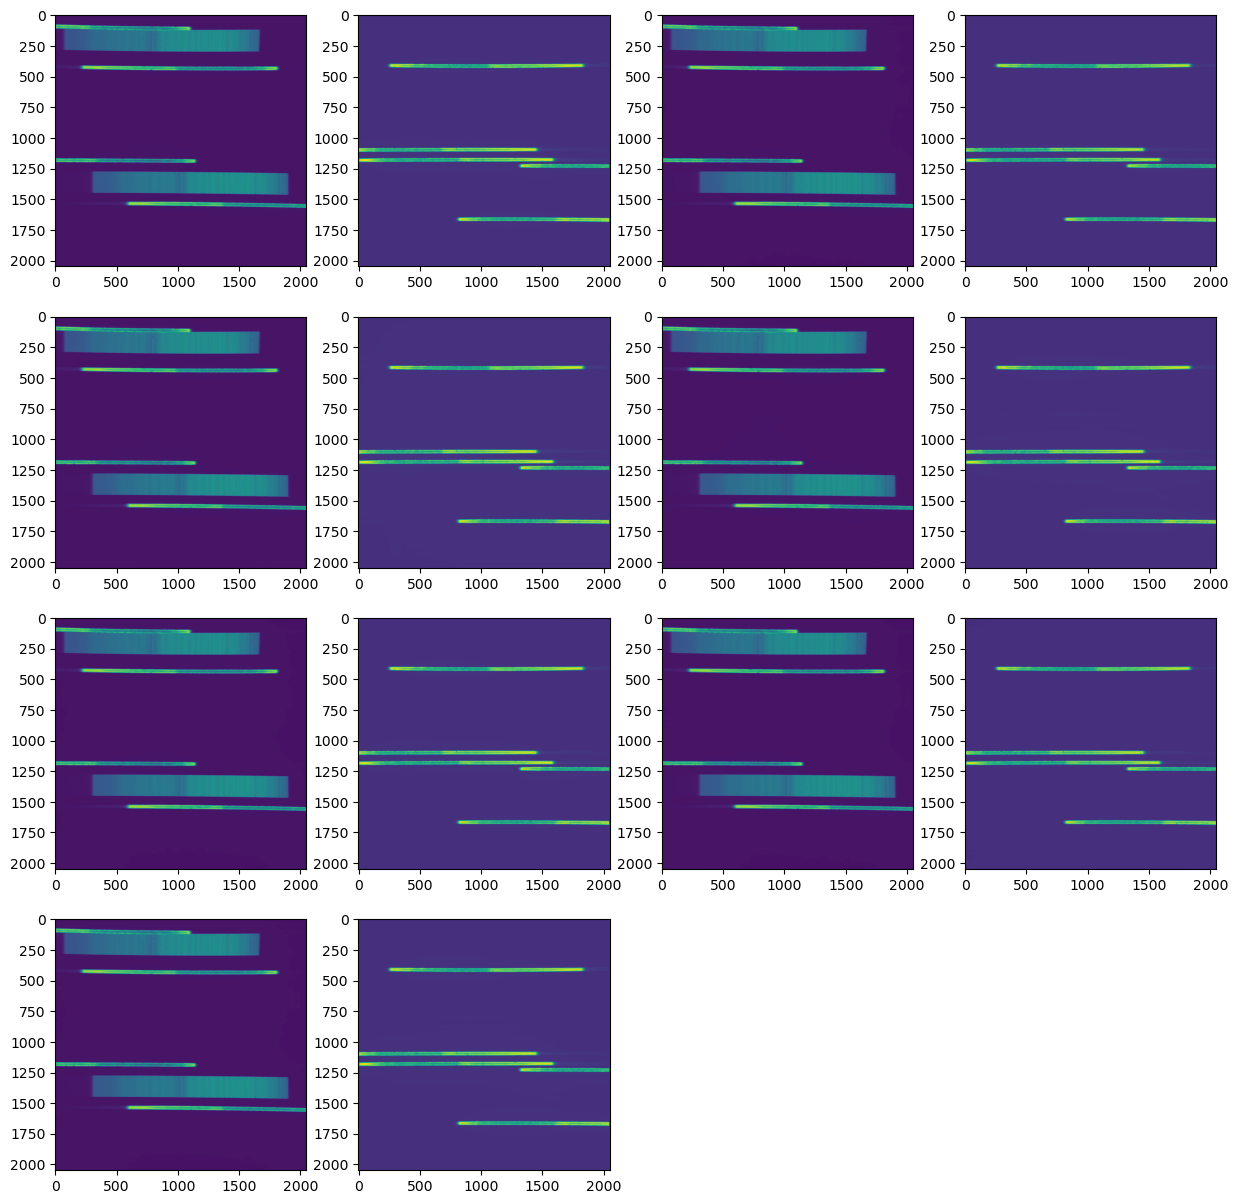

In [6]:
#Removes cosmic rays of domeflat frames

type = frametype[0]
print(type)
name = objectname[o]
frame = file[(file['DATA_TYP']==type)&(file['SLIT']=='AT_'+str(name))&(file['FILTER_3']=='ZJ500')]
frame.reset_index(inplace=True,drop=True)

print(len(frame))

fig = plt.figure(figsize=(15,15))
for i in range(len(frame)):
    with fits.open('/data_pde01/work/ayumi/mywork/data/obs/raw/s23b064/'+str(frame['FRAMEID'][i])+'.fits')as load_fits:
        img = load_fits[0].data
        sigclip = 3
        img_clp = LAC.detect_cosmics(img,sigclip=sigclip)
        hdu = fits.PrimaryHDU(img_clp[1])
        hdulist = fits.HDUList([hdu])
        #hdulist.writeto(path_fits+str(frame['FRAMEID'][i])+'_clip'+'.fits',overwrite=True)
        print(path_fits+str(frame['FRAMEID'][i])+'_clip'+'.fits')

    plt.subplot(4,4,i+1)
    plt.imshow(img_clp[1])

plt.show()

In [7]:
#Removes cosmic rays of object frames

type = frametype[2]
name = objectname[o]
frame = file[(file['DATA_TYP']==type)&(file['SLIT']=='AT_'+str(name))]
frame.reset_index(inplace=True,drop=True)
print('Number of frames: '+str(len(frame)))

ig = plt.figure(figsize=(40,140))
for i in range(len(frame)):

    with fits.open(path_data+str(frame['FRAMEID'][i])+'.fits')as load_fits:
        img = load_fits[0].data
        img_clip = LAC.detect_cosmics(img,sigclip=3)
        hdu = fits.PrimaryHDU(img_clip[1])
        hdulist = fits.HDUList([hdu])
        #hdulist.writeto(path_fits+str(frame['FRAMEID'][i])+'_clip'+'.fits',overwrite=True)

    plt.subplot(12,4,i+1)
    plt.imshow(img_clip[1])

plt.show()

Number of frames: 48


FileNotFoundError: [Errno 2] No such file or directory: '/data_pde01/work/ayumi/mywork/data/MCSA00294785.fits'

<Figure size 4000x14000 with 0 Axes>

In [9]:
########## STD/OBJECT fits ###########

def image(i,t,o):
    type = frametype[t]
    name = objectname[o]
    frame = file[(file['DATA_TYP']==type)&(file['SLIT']=='AT_'+str(name))&(file['FILTER_3']=='ZJ500')]
    frame.reset_index(inplace=True,drop=True)
    img = fits.open(path_fits+str(frame['FRAMEID'][i])+'_clip'+'.fits')[0].data
    return img

In [10]:
##### STD_Calibration #####
t =  1
print(frametype[t])
print(objectname[0])
type = frametype[t]
name = objectname[0]
      
frame = file[(file['DATA_TYP']==type)&(file['SLIT']=='AT_'+str(name))&(file['FILTER_3']=='ZJ500')]
frame.reset_index(inplace=True,drop=True)

STD1 = [image(i,t,0)for i in frame[frame['DET_ID']==1].index.values]

STD2 = [image(i,t,0)for i in frame[frame['DET_ID']==2].index.values]

n_set = np.round(len(frame)/2).astype(int) #Detector1,2のフレームセット
img_std1 = [STD1[i_d]/cube_df1_sum for i_d in range(n_set)]#----- Domeflatで割ったSTD frame
img_std2 = [STD2[i_d]/cube_df2_sum for i_d in range(n_set)]
img_std = np.concatenate([[img_std1],[img_std2]])

fig, axes = plt.subplots(2, 2,figsize=(10, 10),sharex= True,tight_layout=True)

axes[0,0].imshow(img_std[0][0])
axes[0,0].text(1500.,250.,'Detec1',fontsize=20)
axes[0,1].imshow(img_std[0][1])
axes[0,1].text(1500.,250.,'Detec1',fontsize=20)

axes[1,0].imshow(img_std[1][0])
axes[1,0].text(1500.,250.,'Detec2',fontsize=20)
axes[1,1].imshow(img_std[1][1])
axes[1,1].text(1500.,250.,'Detec2',fontsize=20)
#plt.savefig(path_figure+'frame_'+str(type)+str(objectname[0])+'.png',bbox_inches="tight")
#plt.show()

STANDARD
J2231


NameError: name 'cube_df1_sum' is not defined

## ここから下はDF割したデータに適用する

In [11]:
fig = plt.figure(figsize=(10,10), )
#plt.imshow(spec_1d,vmin= VMIN,vmax = VMAX)
#plt.text(1800,1300,str(objectname[o]),fontsize=30)

i = 0
VMIN = np.median(img_obj1[i])-np.std(img_obj1[i])
VMAX = np.median(img_obj1[i])+np.std(img_obj1[i])
plt.imshow(img_obj1[i],vmin = VMIN,vmax = VMAX)
plt.title(str(frame['FRAMEID'][i]),fontsize=20)

plt.xlim(480,515)#
plt.ylim(1500,1250)
plt.ylim(1450,1300)#トリミング

fig = plt.figure(figsize=(20,5), )
for q in np.arange(1300,1450,1):
    plt.plot(img_obj1[i][q,:])

plt.xlim(300,700)
plt.xlim(480,515)#

#plt.savefig(path_figure+objectname[o]+'_hoge.png',bbox_inches='tight')
plt.show()


NameError: name 'img_obj1' is not defined

<Figure size 1000x1000 with 0 Axes>

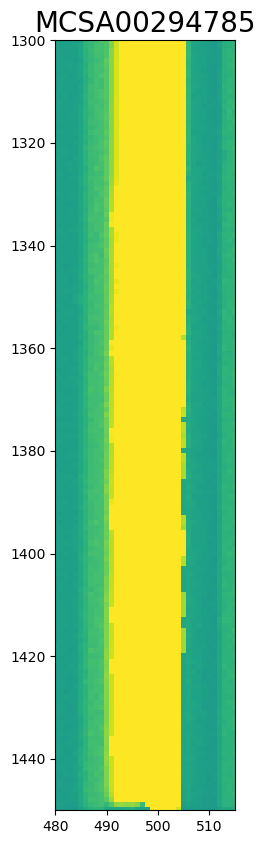

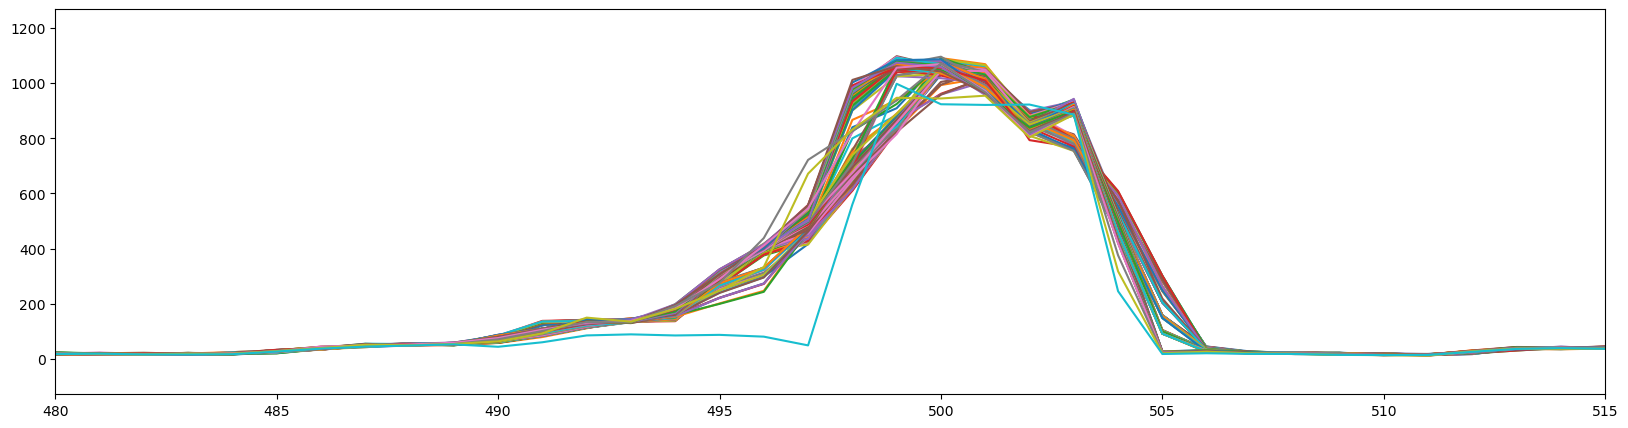

In [415]:
fig = plt.figure(figsize=(10,10), )
#plt.imshow(spec_1d,vmin= VMIN,vmax = VMAX)
#plt.text(1800,1300,str(objectname[o]),fontsize=30)

i = 0
VMIN = np.median(img_obj1[i])-np.std(img_obj1[i])
VMAX = np.median(img_obj1[i])+np.std(img_obj1[i])
plt.imshow(img_obj1[i],vmin = VMIN,vmax = VMAX)
plt.title(str(frame['FRAMEID'][i]),fontsize=20)

plt.xlim(480,515)#
plt.ylim(1500,1250)
plt.ylim(1450,1300)#トリミング

fig = plt.figure(figsize=(20,5), )
for q in np.arange(1300,1450,1):
    plt.plot(img_obj1[i][q,:])

plt.xlim(300,700)
plt.xlim(480,515)#

plt.savefig(path_figure+objectname[o]+'_hoge.png',bbox_inches='tight')
plt.show()


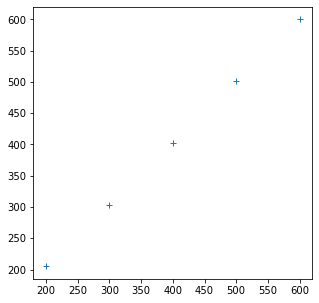

In [172]:
x_ref = np.array([200,300,400,500,600]) #適当に決めたy座標 (*)
x_est = np.array([205,303,402,501,600]) #fittingして求めたOHピーク

fig = plt.figure(figsize=(5,5))
plt.plot(x_ref,x_est,ls='',marker='+') #これに対して多項式fitをする

the number of y-pixel: 150


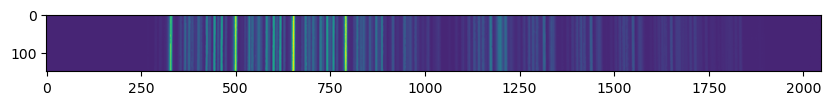

In [18]:
##### slit を切り取り
plt.figure(figsize=(10,7), )
plt.imshow(img_obj1[i][1300:1450, :]) #
print('the number of y-pixel: '+str(len(img_obj1[i][1300:1450,:])))



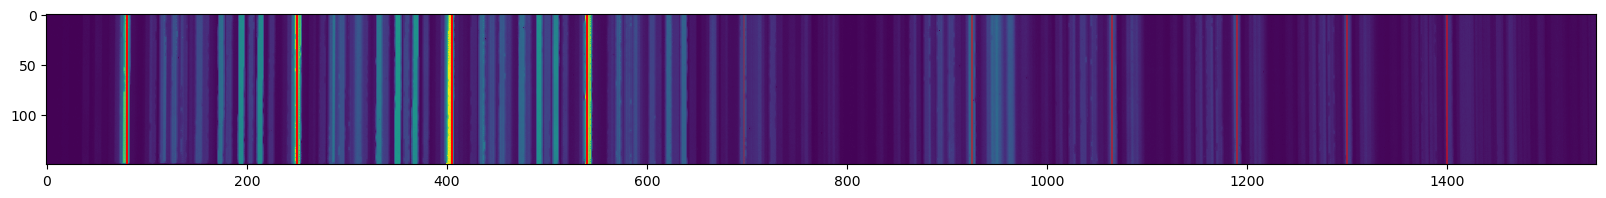

In [19]:
plt.figure(figsize=(20,10), )
xmin,xmax = 250,1800
ymin,ymax = 1300,1450
plt.imshow(img_obj1[i][ymin:ymax,xmin:xmax]) #
#print('the number of y-pixel: '+str(len(img_obj1[i][1300:1450,250:800])))

plt.axvline(80,c='red')
plt.axvline(250,c='red')
plt.axvline(405,c='red')
plt.axvline(540,c='red')
plt.axvline(697,c='red',alpha=0.25)
plt.axvline(925,c='red',alpha=0.5)
plt.axvline(1065,c='red',alpha=0.5)
plt.axvline(1190,c='red',alpha=0.5)
plt.axvline(1300,c='red',alpha=0.5)
plt.axvline(1400,c='red',alpha=0.5)




In [85]:
##### OH夜行のxピクセルを格納したアレイ #####

list_x_oh = [80,250,405,540,665,925,1065,1190,1300,1401]

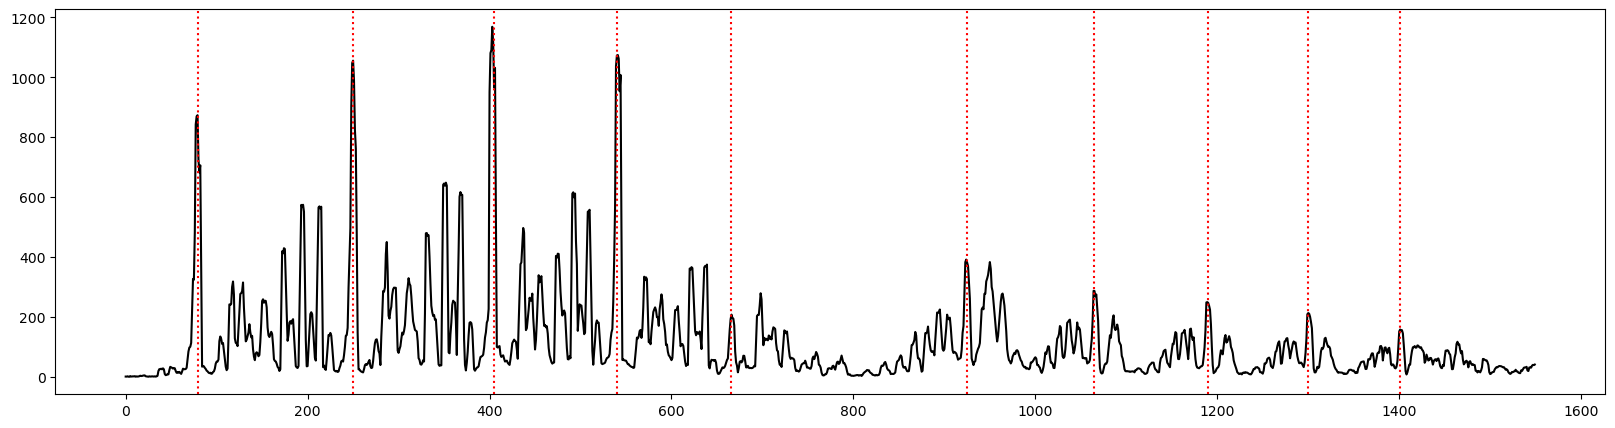

In [86]:
fig = plt.figure(figsize=(20,5), )
plt.plot(img_obj1[i][1400,xmin:xmax],c='black')

for i_oh in list_x_oh:
    plt.axvline(i_oh,ls=':',c='red')

Text(0, 0.5, 'y pixel')

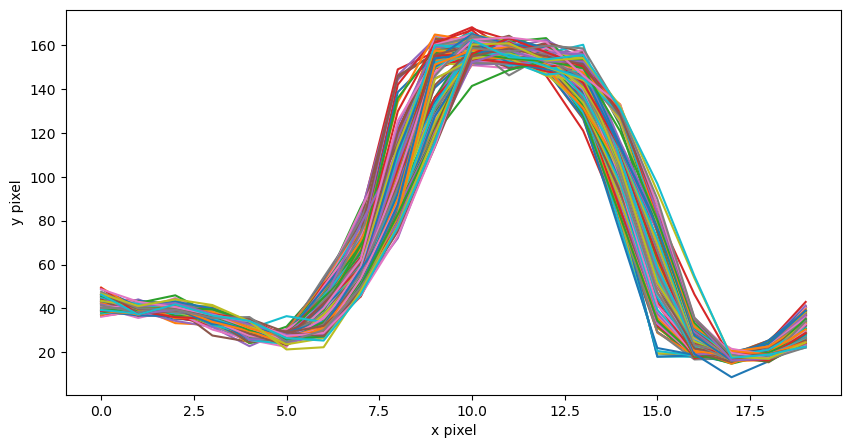

In [191]:
#### gaissian-fitting する空間方向の数
plt.figure(figsize=(10,5))
n_ypix = int(ymax-ymin)
n_xpix = 20
array_oh = np.zeros((n_ypix,n_xpix))
i = 0
for n,q in enumerate(np.arange(ymin,ymax,1)):
    dxmin = 10 #<-----------OHによってマイナス方向に20とるか、10とる
    img_cut = img_obj1[i][q,xmin:xmax]
    img_cut_1d = img_cut[list_x_oh[n_oh]-dxmin:list_x_oh[n_oh]+10] #list_x_oh のindexはOH輝線の左からカウントしたID
    array_oh[n] = img_cut_1d
    plt.plot(img_cut_1d)


#plt.axvline(20.5,ls=':',color='black') # A center of gaussian-1 
#plt.axvline(16,ls=':',color='black') # A center of gaussian-2
#plt.axvline(13,ls=':',color='black') # A center of gaussian-3
#plt.axvline(8,ls=':',color='black') # A center of gaussian-3


#plt.axhline(50,ls=':',color='black') # A center of gaussian-3
#plt.axhline(100,ls=':',color='black') # A center of gaussian-3
#plt.axhline(100,ls=':',color='black') # A center of gaussian-3
#plt.axhline(500,ls=':',color='black') # A center of gaussian-3


plt.xlabel('x pixel')
plt.ylabel('y pixel')

#plt.xlim(480,515)
## memo
### Three-gaussian のfittingで良さそう

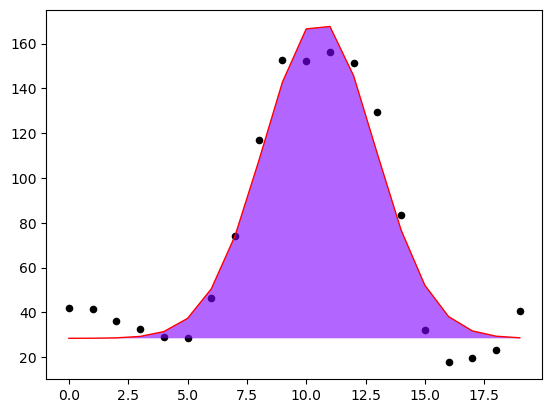

In [195]:
from scipy.optimize import curve_fit
import matplotlib.cm as cm

#### フィッティング用の関数を定義　####
def func(x,*params):

    #paramsの長さでフィッティングする関数の数を判別
    num_func = int(len(params)/3)

    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加
    y_list = []
    for n_f in range(num_func):
        y = np.zeros_like(x)#zeros_like は引数の配列と同じ形状のゼロ配列を返す
        param_range = list(range(3*n_f,3*(n_f+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp*np.exp(-((x - ctr)/wid)**2)
        y_list.append(y)

    #y_listに入っている全てのガウス関数を重ね合わせる
    y_sum = np.zeros_like(x)
    for i_y in y_list:
        y_sum = y_sum + i_y

    #最後にバッググラウンドを追加

    y_sum = y_sum + params[-1]

    return y_sum


#### プロット用の関数を定義　####
def fit_plot(x,*params):
    num_func = int(len(params)/3)
    y_list = []
    for n_f in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*n_f,3*(n_f+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list


#### 初期値の設定　####

#[amp,ctr,wid]
## Three gaussian componentsでフィッティングする
#guess1 = []
#guess.append([10,6,10])
#guess.append([100,13,2.5])
#guess.append([200,17,10])
#guess.append([500,20.5,10])

guess = []
a1,c1,w1 = 300,11,10 #<--------c1をOHごとに変える
guess.append([a1,c1,w1])

#guess.append([100,6,10])

#バックグラウンドの初期値
background = 0

#初期値リストの結合
guess_total = []
for i_g in guess:
    guess_total.extend(i_g)
guess_total.append(background)

#### １つの輝度分布(空間方向に1つだけ切り取ったx)に対してフィッティング　####
x = np.arange(0,20,1)#<--------------------------------------------- OHによっては20ピクセルか30ピクセル
y = array_oh[0]

popt, pcov = curve_fit(func, x, y, p0=guess_total,maxfev = 100000) #最適化されたパラメータがpoptの中に入る

df = pd.DataFrame([popt],columns=['ampritude1','center1','width1','hoge'])
#df

fit = func(x, *popt)
plt.scatter(x, y, c='black',s=20)
plt.plot(x, fit , ls='-', c='red', lw=1)

y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)


In [197]:
##### 空間方向に150ピクセル分fittingする　####


paralist = np.zeros((n_ypix,4))
model = np.zeros((n_ypix,n_xpix))

def gaus_fit(y,q):
    
    xdata = np.arange(0,n_xpix,1)
    ydata = y
    
    popt, pcov = curve_fit(func, xdata, ydata, p0=guess_total,maxfev = 100000) #最適化されたパラメータがpoptの中に入る

    paralist[q] = popt
       
    fit = func(xdata, *popt)
    model[q] = fit

    plt.subplot(n_row,n_col,q+1)
    plt.scatter(xdata, ydata, c='black',s=20)
    
    plt.plot(xdata, fit , ls='-', c='red', lw=1)
    plt.text(c1+8,np.max(ydata)*0.8,str(q))
    
    y_list = fit_plot(xdata, *popt)
    baseline = np.zeros_like(xdata) + popt[-1]
    for n,i_y in enumerate(y_list):
        plt.fill_between(xdata, i_y, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)







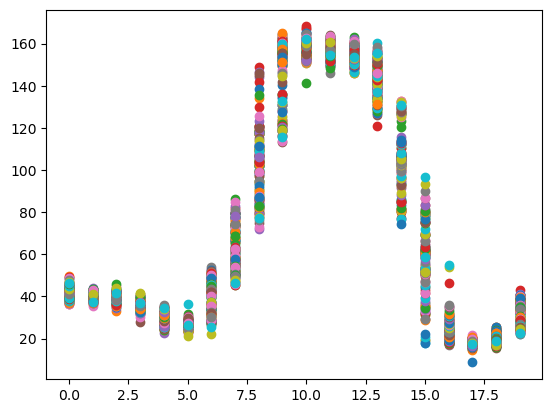

In [198]:
for q in range(n_ypix):
    plt.scatter(np.arange(0,n_xpix,1),array_oh[q])

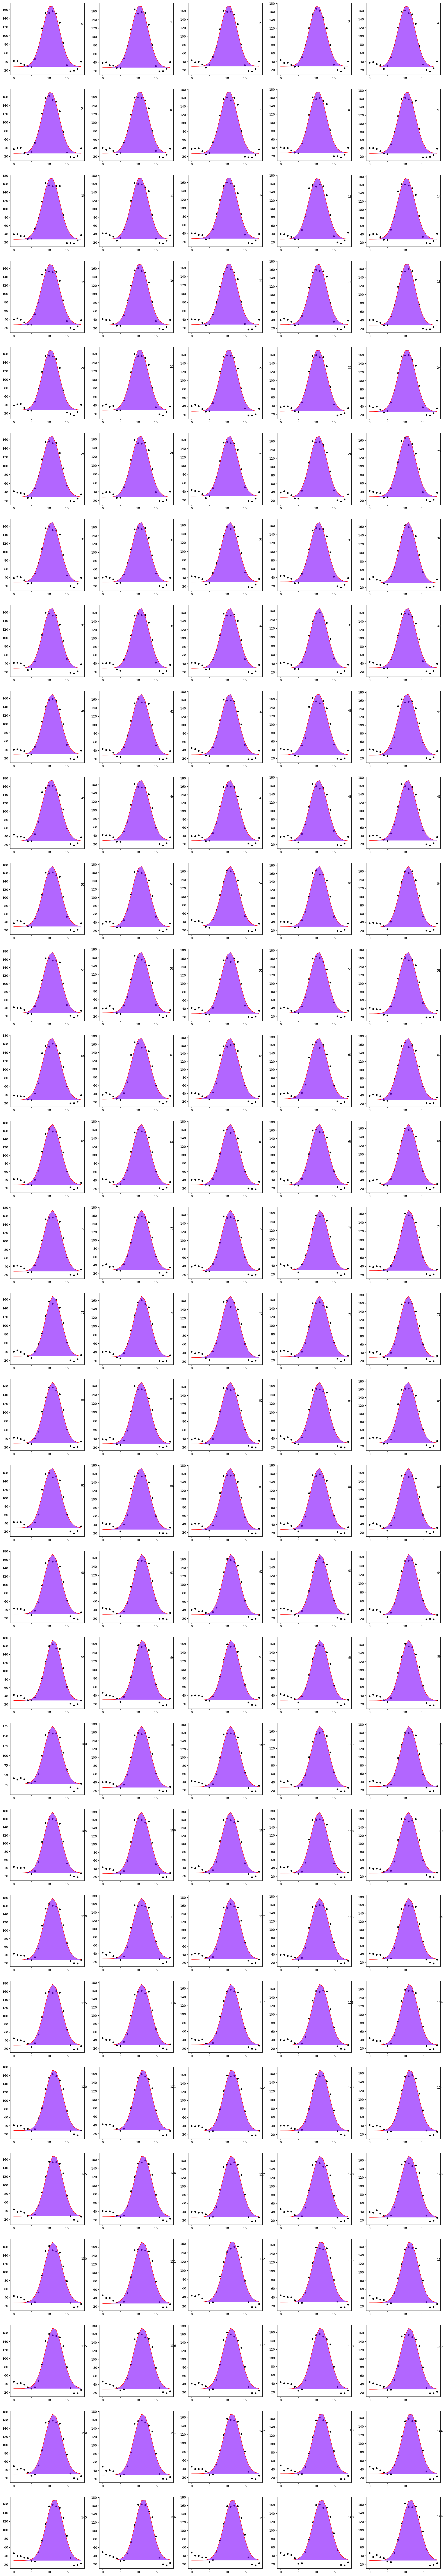

In [199]:
n_row, n_col = 30,5 

plt.figure(figsize=(n_col*5,n_row*5))



for q in range(n_ypix):
    
    #print(q,p)
    gaus_fit(array_oh[q],q)

######### fitting 結果を保存　#######

df_para = pd.DataFrame(paralist,columns=['ampritude1','center1','width1','hoge'])
df_para.to_csv(path_output+str(objectname[o])+'_OH_'+str(n_oh)+'_FittingResults.csv',index = False)

#np.save(path_output+str(objectname[o])+'_bestfit',model)

#plt.close()
#plt.savefig(path_figure+objectname[o]+'_distortioncorrection.png',bbox_inches='tight')
plt.show()

In [123]:
df_para

,ampritude1,center1,width1,hoge
0,330.971501,19.740752,3.294084,87.559593
1,322.693382,19.769638,-3.304794,87.922977
2,321.047228,19.752063,-3.299665,88.562055
3,323.176986,19.663988,-3.259347,88.208328
4,328.478567,19.641912,3.338671,88.297508
...,...,...,...,...
145,342.135776,20.017328,-3.480756,86.785443
146,337.655897,20.063580,3.431358,87.888852
147,335.820864,20.016263,-3.497765,87.331373
148,338.435028,20.011672,-3.502297,86.819093


In [123]:
bestfit = np.load(path_output+str(objectname[o])+'_bestfit_OH'+str(n_oh)+'.npy')

,ampritude1,center1,width1,hoge
0,330.971501,19.740752,3.294084,87.559593
1,322.693382,19.769638,-3.304794,87.922977
2,321.047228,19.752063,-3.299665,88.562055
3,323.176986,19.663988,-3.259347,88.208328
4,328.478567,19.641912,3.338671,88.297508
...,...,...,...,...
145,342.135776,20.017328,-3.480756,86.785443
146,337.655897,20.063580,3.431358,87.888852
147,335.820864,20.016263,-3.497765,87.331373
148,338.435028,20.011672,-3.502297,86.819093


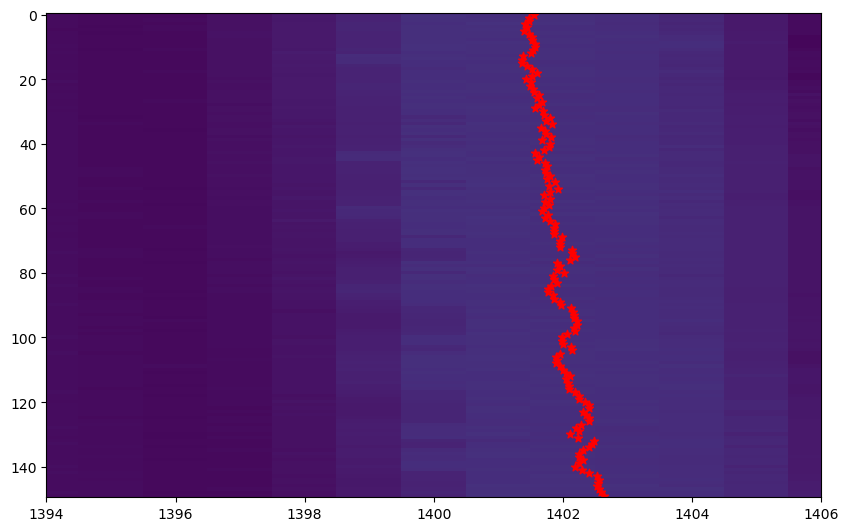

In [200]:
i = 0
plt.figure(figsize=(10,15))
plt.imshow(img_obj1[i][ymin:ymax,xmin:xmax])
plt.xlim(list_x_oh[n_oh]-7,list_x_oh[n_oh]+5)

hoge = np.arange(list_x_oh[n_oh]-dxmin,list_x_oh[n_oh]+10,1)

x_oh_center = [df_para.center1[n]for n in range(n_ypix)]
plt.scatter(list_x_oh[n_oh]-dxmin+np.array(x_oh_center),np.arange(n_ypix),c='red',marker='*')
#img_cut = img_obj1[i][ymin:ymax,xmin:xmax]

#plt.imshow(img_cut)
#plt.imshow(img_cut) #


plt.gca().set_aspect(0.05)

Text(0, 0.5, 'x pixel')

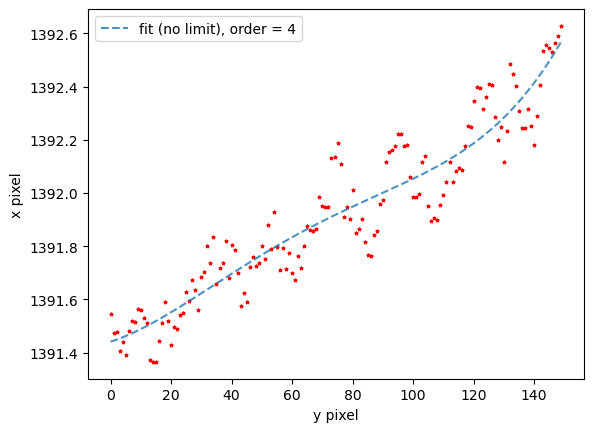

In [201]:
####### これを多項でfit ####

### ypixelをxdata, xpixelをydata

xdata = np.arange(n_ypix)
ydata = list_x_oh[n_oh]-20+np.array(x_oh_center)
plt.scatter(xdata,ydata,s=5,c='red',marker='*')

weight = np.ones(len(xdata))
#npoly=10
#coef=np.polyfit(xdata, ydata, npoly, w=weight)
#yfit = np.poly1d(coef)(xdata)  
#plt.errorbar(xdata,yfit,fmt="--",label="fit (no limit), order = "  +str(npoly),alpha=0.8,ms=3)

npoly=4

coef=np.polyfit(xdata, ydata, npoly, w=weight)
yfit = np.poly1d(coef)(xdata) 
plt.errorbar(xdata,yfit,fmt="--",label="fit (no limit), order = "  +str(npoly),alpha=0.8,ms=3)

plt.legend()
plt.xlabel('y pixel')
plt.ylabel('x pixel')

##### y方向ナンピクセルは多項式でどこか、yとfの対応関係を保存

#今、1つのOH夜光のfit函数を作成した
#全部のOH夜光分のfit函数のモデルを保存。
#できたら、まず空間方向で固定したreferenceのピクセルを決定。これはOHのxピクセルを較正するのに使う。
#X_refに対して、空間方向で固定したあるyピクセルの時のXピクセル(ここのXピクセルは一つ前の段階で多項式fitにより求めたあるyの時のxの値を使う)のあたいを比較　(XピクセルはOH分できる)。この両者でさらにfittingする。
#あるyの時の較正したxピクセルの配列がyピクセル分出来上がる。


In [12]:
pwd

'/data_pde01/work/ayumi/mywork/python/s23b064'